# Table of Content

- ## Introduction

      The lifeblood of any business is its customers. Businesses are always finding ways to
      better understand their customers so that they can provide more efficient and tailored
      solutions to them. Exploratory Data Analysis is a fundamental step in the data science
      process. It involves all the processes used to familiarize oneself with the data and
      explore initial insights that will inform further steps in the data science process.
      
- ## Objective

     > #### Explore the dataset to understand the customers on a lighter note
      
- ## Research Question

 > Start by identifying the top 10 handsets used by the customers.
 > Then, identify the top 3 handset manufacturers
 > Next, identify the top 5 handsets per handset manufacturer
 > Make a short interpretation and recommendation to marketing teams
 > Aggregate per user the following information in the column - (Jupyter notebook):
    > number of xDR sessions
    > Session duration
    > the total download (DL) and upload (UL) data
    > the total data volume (in Bytes) during this session for each application
    
- ## Analysis
 - #### Import necessary libraries
 - #### Read the data
 - #### Preprocessing
 - #### Exploratory Data Analysis



> # Import all necessary libraries and packages

In [1]:
#!pip install openpyxl
#import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
sns.set(style="whitegrid")
#sns.set(style="ticks", palette="pastel")
sns.set_context('notebook')

In [3]:
import re
from scipy import stats
import numpy as np

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

> ### Read file from data folder

In [5]:
data = pd.read_excel('data/Week2_challenge_data_source.xlsx')

> ### Preprocessing

>
  >  ##### create a list for various data types

In [6]:
categorical_features = []
numerical_features = []
datetime_feature = []

feature = data.columns.to_series().groupby(data.dtypes).groups
for name , value in feature.items():
    if name.name == 'object':
        categorical_features.append(value)
    elif name.name in ['int64','int32','float64','float32']:
        numerical_features.append(value)
    elif name.name == 'datetime64[ns]':
        datetime_feature.append(value)

> ##### Check for in categorical features 

In [7]:
# categorical dataframe

categorical_data = data[categorical_features[0]]

In [8]:
# check the total number of null values in each categorical column

categorical_data.isna().sum()

Bearer Id                  0
Last Location Name      1153
Handset Manufacturer     572
Handset Type             572
dtype: int64

In [9]:
# percentage of null values 

categorical_data.isna().sum() / len(categorical_data)

Bearer Id               0.000000
Last Location Name      0.007687
Handset Manufacturer    0.003813
Handset Type            0.003813
dtype: float64

In [10]:
# function to check if a value is a string object
# returns a boolean value True --> if its a string   False --> if its not a string object

def is_str(s):
    a = isinstance(s,str)
    return a

In [11]:
# apply the string object check function to the Bearer Id column
# Bearer Id had a number of float  values but its type is object
# you can check the categorical['Bearer Id'].dtype  which return object dtype
# this checks if the column contains any string value
# returns total number of rows astring appears

categorical_data['Bearer Id'].apply(is_str).sum()

991

In [12]:
categorical_data[categorical_data['Bearer Id'].apply(is_str)].head(10)

,Bearer Id,Last Location Name,Handset Manufacturer,Handset Type
463,,NaN,NaN,NaN
478,,NaN,NaN,NaN
503,,NaN,NaN,NaN
4176,,NaN,Huawei,Huawei Honor 10
4365,,NaN,NaN,NaN
4476,,NaN,NaN,NaN
4554,,NaN,NaN,NaN
4581,,NaN,NaN,NaN
4686,,NaN,NaN,NaN
4966,,NaN,NaN,NaN


> ##### Check for in numerical features

In [13]:
# create a numerical dataframe

numerical_data = data[numerical_features[0]]

In [14]:
# check the total number of null values in each column of the dataframe

numerical_data.isna().sum()

Start ms                                         1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [15]:
# calculates the percentage of null values in each 
# column of the numerical dataframe

numerical_data.isna().sum() / len(numerical_data)

Start ms                                    0.000007
End ms                                      0.000007
Dur. (ms)                                   0.000007
IMSI                                        0.003800
MSISDN/Number                               0.007107
IMEI                                        0.003813
Avg RTT DL (ms)                             0.185525
Avg RTT UL (ms)                             0.185412
Avg Bearer TP DL (kbps)                     0.000007
Avg Bearer TP UL (kbps)                     0.000007
TCP DL Retrans. Vol (Bytes)                 0.587636
TCP UL Retrans. Vol (Bytes)                 0.644322
DL TP < 50 Kbps (%)                         0.005027
50 Kbps < DL TP < 250 Kbps (%)              0.005027
250 Kbps < DL TP < 1 Mbps (%)               0.005027
DL TP > 1 Mbps (%)                          0.005027
UL TP < 10 Kbps (%)                         0.005280
10 Kbps < UL TP < 50 Kbps (%)               0.005280
50 Kbps < UL TP < 300 Kbps (%)              0.

In [16]:
a = numerical_data.isna().sum() / len(numerical_data)

In [17]:
# returns the numerical column which has a large 
# proportion of null values
# returns column which null values is greater than 1 percent

high_missing_value_feature_names = []
for name, value in a.to_dict().items():
    if value > 0.01:
        high_missing_value_feature_names.append(name)

In [18]:
high_missing_value_feature_names

['Nb of sec with 6250B < Vol UL < 37500B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Avg RTT UL (ms)',
 'Nb of sec with 125000B < Vol DL',
 'Avg RTT DL (ms)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'TCP DL Retrans. Vol (Bytes)']

> #### Drop Rows
    
    From the exploratory analysis above, we nooticed that Bearer Id contains str object
    this object are empty strings and do not contain any information about the the user session
    so it should be dropped
    
    the MSISDN contains some missing values. This values cannot be imputed as there are unique
    MSISDN is synonymous to a mobile user phone number.
    

In [19]:
#bearer = pd.to_numeric(data['Bearer Id'], errors = 'coerce')

In [20]:
"""
remove rows with empty strings and missing values
MSISDN/Number is a unique identifier to users and 
null entries cannot be imputed with mode/mean/median

using mode would skew the the data to a particular user
during modelling and other exploratory analysis

"""

data.drop(data.loc[data['Bearer Id'].apply(is_str)].index, inplace = True)

data.drop(data.loc[data['MSISDN/Number'].isna()].index, inplace = True)

#### convert MSISDN to string so that its plotted as a categorical variable

In [57]:
data['MSISDN/Number'] = data['MSISDN/Number'].astype('str')

> ### TASK 1.1

#### Top 10 Handsets used by Customers

In [21]:
handset = pd.DataFrame(data['Handset Type'].value_counts().head(10)).reset_index()
handset.columns= ['Handet Type', 'Customer count']
handset

,Handet Type,Customer count
0,Huawei B528S-23A,19727
1,Apple iPhone 6S (A1688),9395
2,Apple iPhone 6 (A1586),8993
3,undefined,8904
4,Apple iPhone 7 (A1778),6279
5,Apple iPhone Se (A1723),5165
6,Apple iPhone 8 (A1905),4977
7,Apple iPhone Xr (A2105),4556
8,Samsung Galaxy S8 (Sm-G950F),4464
9,Apple iPhone X (A1901),3806


#### Top 3 Handset Manufacturers

In [22]:
top_manufacturers = data['Handset Manufacturer'].value_counts()[:3].reset_index()
top_manufacturers.columns = ['Manufacturer', ' Total phone produced']
top_manufacturers

,Manufacturer,Total phone produced
0,Apple,59339
1,Samsung,40429
2,Huawei,34296


#### top 5 handsets per handset manufacturer

In [24]:
top_5 = data.groupby(['Handset Manufacturer','Handset Type'])['Handset Type'].count().reset_index(name = 'count')

In [36]:
top5_per_handset = top_5.sort_values(by = ['Handset Manufacturer','count'], ascending = False).groupby('Handset Manufacturer').head(5)

* ##### Bearer Id
* ##### Dur. (ms).1
* ##### Total UL (Bytes)
* ##### Total DL (Bytes)
* ##### Social_media Data Volume
* ##### Google Data Volume
* ##### Other Data Volume
* ##### Email Data Volume
* ##### Youtube Data Volume
* ##### Netflix Data Volume
* ##### Gaming Data Volume

#### Convert bytes to megabytes to understand user usage of various data usage better

In [142]:
# convert values from bytes to megabytes

def bytes_to_megabytes(num):
    if not isinstance(num, str):
        mb = 1024 ** 2
        return float('{0:.2f}'.format(num/mb))
    else:
        return num

#### number of sessions per user

In [58]:
number_of_sessions = data.groupby('MSISDN/Number')['Bearer Id'].size()

In [59]:
session_per_user = number_of_sessions.reset_index(name = 'Session Count')

In [73]:
top_sess_per_user = session_per_user.sort_values(by = 'Session Count'  , ascending = False).head(2000)

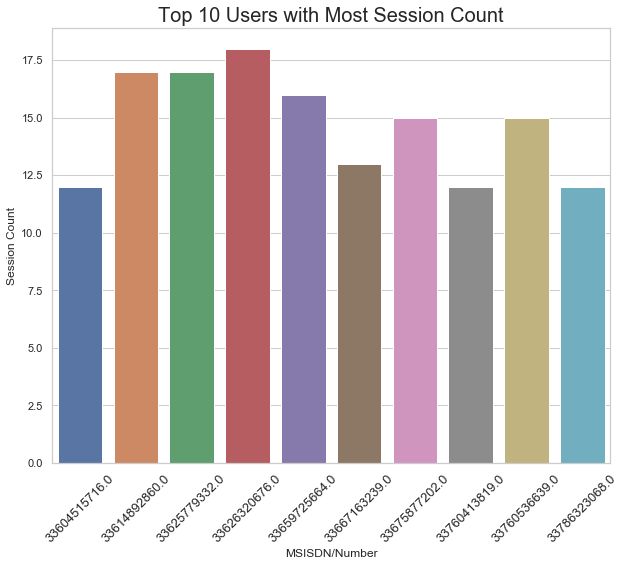

In [144]:
plt.figure(figsize = (10,8))
sns.barplot(data = top_sess_per_user.head(10) , x = 'MSISDN/Number',y = 'Session Count')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users with Most Session Count', fontsize = '20')
plt.show()

In [78]:
#### save top 2000 users with most session count
top_sess_per_user.to_csv('data/users with highest sessions count')

#### session duration

In [79]:
sessions_duration = data.groupby('MSISDN/Number')['Dur. (ms).1'].sum()
session_duration = sessions_duration.reset_index(name = 'total_duration_per_user')

session_duration['total_duration_per_user'] = session_duration['total_duration_per_user'].apply(bytes_to_megabytes)

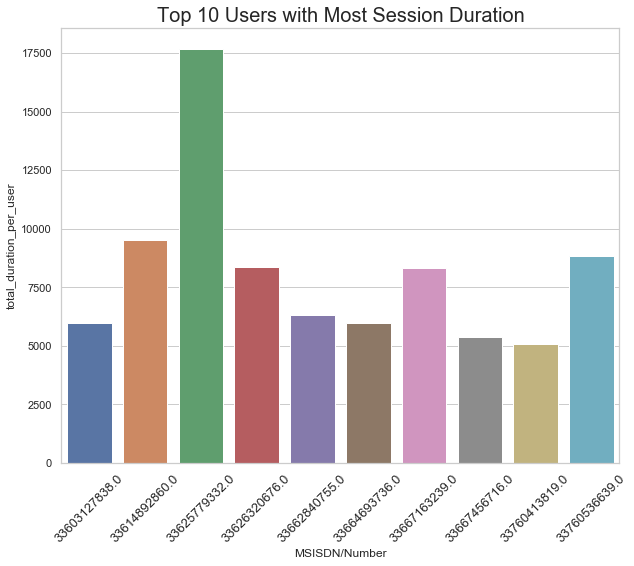

In [145]:
top_total_session = session_duration.sort_values(by = 'total_duration_per_user'  , ascending = False).head(2000)

plt.figure(figsize = (10,8))
sns.barplot(data = top_total_session.head(10) , x = 'MSISDN/Number',y = 'total_duration_per_user')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users with Most Session Duration', fontsize = '20')
plt.show()

In [81]:
#### save top 2000 users with most session duration
top_total_session.to_csv('data/users with highest sessions duration')

#### the Total download (DL) and Upload (UL) data

In [85]:
total_download = data.groupby('MSISDN/Number')['Total UL (Bytes)','Total DL (Bytes)'].sum().reset_index()

total_download[['Total UL (Bytes)','Total DL (Bytes)']] = total_download[['Total UL (Bytes)','Total DL (Bytes)']].applymap(bytes_to_megabytes)

In [121]:
total_download.head()

,MSISDN/Number,Total UL (Bytes),Total DL (Bytes)
6405,33614892860.0,657.54,7778.88
92586,33760536639.0,670.89,7449.43
13124,33625779332.0,695.78,7410.09
76078,33675877202.0,554.63,6970.92
13468,33626320676.0,638.63,6963.27


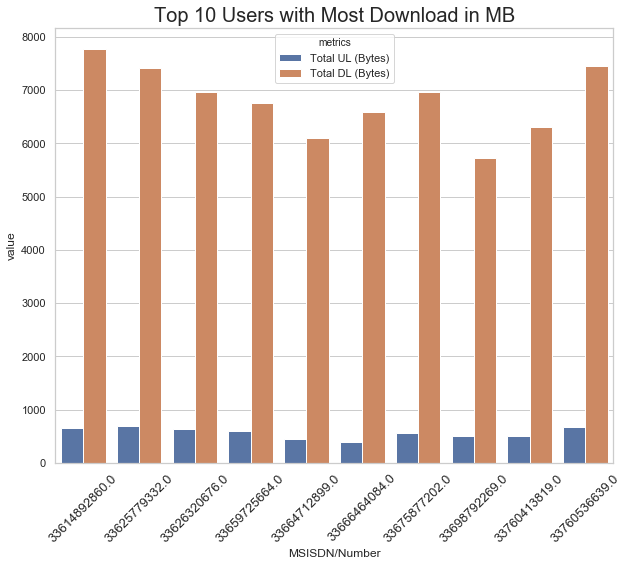

In [146]:
total_download = total_download.sort_values(by = ['Total DL (Bytes)','Total UL (Bytes)']  , ascending = [False,False]).head(2000)

agg_users = pd.melt(id_vars=['MSISDN/Number'], value_vars=['Total UL (Bytes)','Total DL (Bytes)'],
        value_name='value', var_name='metrics', frame=total_download.head(10))

plt.figure(figsize = (10,8))
sns.barplot(data = agg_users , x = 'MSISDN/Number',y = 'value', hue = 'metrics')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users with Most Download in MB', fontsize = '20')
plt.show()

In [88]:
#### save top 2000 users with most upload and download data
users_with_most_download.to_csv('data/users_with_most_download.csv')

In [30]:
#total_download.get_group(208201448079117.0)

#### Feature Aggregation

#### Total Data Volume for each Application

In [91]:
data['Social_media Data Volume'] = data['Social Media DL (Bytes)'].add(data['Social Media UL (Bytes)'])
data['Google Data Volume'] = data['Google DL (Bytes)'].add(data['Google UL (Bytes)'])
data['Email Data Volume'] = data['Email DL (Bytes)'].add(data['Email UL (Bytes)'])
data['Youtube Data Volume'] = data['Youtube DL (Bytes)'].add(data['Youtube UL (Bytes)'])
data['Netflix Data Volume'] = data['Netflix DL (Bytes)'].add(data['Netflix UL (Bytes)'])
data['Gaming Data Volume'] = data['Gaming DL (Bytes)'].add(data['Gaming UL (Bytes)'])
data['Other Data Volume'] = data['Other DL (Bytes)'].add(data['Other UL (Bytes)'])

In [92]:
total_download_app = data.groupby('MSISDN/Number')['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'].sum().reset_index()

In [115]:
total_download_app_megabytes = total_download_app.applymap(bytes_to_megabytes)

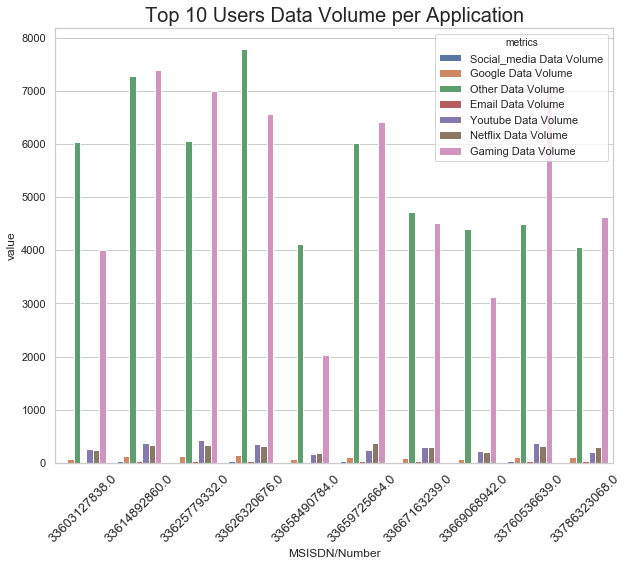

In [147]:
total_download_app_megabytes = total_download_app_megabytes.sort_values(by = ['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'], ascending = [False,False,False,False,False,False,False]).head(2000)

users_per_app = pd.melt(id_vars=['MSISDN/Number'], value_vars=['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'],
        value_name='value', var_name='metrics', frame=total_download_app_megabytes.head(10))

plt.figure(figsize = (10,8))
sns.barplot(data = users_per_app , x = 'MSISDN/Number',y = 'value', hue = 'metrics')
plt.xticks(rotation=45, fontsize=13)
plt.title('Top 10 Users Data Volume per Application', fontsize = '20')
plt.show()

> #### New dataframe containing metrics for user overview analysis

In [126]:
data2 = data[['Bearer Id','Dur. (ms).1','Total UL (Bytes)','Total DL (Bytes)','Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume']]

In [127]:
# create a new column which is the addition of total download and total upload
data2['Total Data Volume'] = data['Total DL (Bytes)'].add(data['Total UL (Bytes)'])

In [128]:
# applied the conversion on this column --> from bytes to megabytes

data_mb = data2[['Total UL (Bytes)','Total DL (Bytes)','Social_media Data Volume','Google Data Volume',\
        'Other Data Volume', 'Email Data Volume','Youtube Data Volume', 'Netflix Data Volume', \
         'Gaming Data Volume','Total Data Volume']].applymap(bytes_to_megabytes)

In [148]:
# dataframe contains converted values in megabytes
data_mb[['Bearer Id','Dur. (ms).1']] = data2[['Bearer Id','Dur. (ms).1']]

In [130]:
data_mb.head()

,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume,Total Data Volume,Bearer Id,Dur. (ms).1
0,35.05,294.57,1.50,2.77,172.19,3.53,17.51,17.03,278.88,329.62,13114483460844900352,1.823653e+09
1,51.31,623.12,1.84,4.21,516.85,0.89,37.54,33.92,581.67,674.42,13114483482878900224,1.365104e+09
2,26.59,266.85,1.65,9.76,395.69,3.21,32.83,22.65,219.33,293.44,13114483484080500736,1.361763e+09
3,41.32,806.84,0.63,11.26,726.54,1.98,34.84,14.39,772.85,848.15,13114483485442799616,1.321510e+09
4,36.76,542.77,0.87,7.39,538.46,2.01,32.64,16.73,506.63,579.53,13114483499480700928,1.089009e+09


In [131]:
#pd.merge(data2[['Bearer Id','Dur. (ms).1']], data_mb , right_index= True , left_index=True)

In [132]:
#data2[['Bearer Id','Dur. (ms).1']].append(data_mb, ignore_index=True).head()

In [133]:
#data.head()

#### Outliers 

> Why are there important and how do they affect the exploratory analysis

> Can identify the outliers in this dataframe before deciding what to do with 
  them.


#### Remove Outliers

> ##### using z-score to remove outliers

In [52]:
data_outliers = data_mb.iloc[:,:-2] 
data_outliers.head()

,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume,Total Data Volume
0,35.05,294.57,1.50,2.77,172.19,3.53,17.51,17.03,278.88,329.62
1,51.31,623.12,1.84,4.21,516.85,0.89,37.54,33.92,581.67,674.42
2,26.59,266.85,1.65,9.76,395.69,3.21,32.83,22.65,219.33,293.44
3,41.32,806.84,0.63,11.26,726.54,1.98,34.84,14.39,772.85,848.15
4,36.76,542.77,0.87,7.39,538.46,2.01,32.64,16.73,506.63,579.53


In [53]:
"""
Using the zscore and a threshold of 3 remove outliers from the da 
"""

z = np.abs(stats.zscore(data_outliers))
data_outliers = data_outliers[(z < 3).all(axis=1)]

In [54]:
data_outliers.shape

(148451, 10)

#### Non Graphical Univariate Analysis

In [134]:
#data_outliers.describe()

In [135]:
descriptive_analysis = data_mb.describe()
descriptive_analysis

,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume,Total Data Volume,Dur. (ms).1
count,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,1.485060e+05
mean,39.214496,433.601403,1.743373,7.446355,409.522212,2.154535,21.593502,21.580835,410.417371,472.815897,1.050846e+08
std,10.755960,232.867299,0.987662,3.353814,231.960693,1.021527,8.819273,8.831481,232.750796,233.091945,8.107273e+07
min,2.730000,6.780000,0.000000,0.040000,0.140000,0.010000,0.080000,0.090000,0.290000,27.610000,7.142988e+06
25%,31.680000,231.862500,0.890000,4.720000,208.540000,1.300000,15.250000,15.240000,208.602500,271.350000,5.824964e+07
50%,39.240000,434.820000,1.740000,7.450000,410.120000,2.160000,21.610000,21.590000,411.660000,473.900000,8.639999e+07
75%,46.760000,634.910000,2.600000,10.190000,610.250000,3.010000,27.940000,27.930000,611.810000,673.837500,1.329333e+08
max,74.700000,861.140000,3.480000,14.810000,819.700000,4.310000,43.100000,43.100000,819.400000,911.700000,1.859336e+09


In [57]:
descriptive_analysis.to_excel('data/Descriptive Table.xlsx')

#### Box Plot on all Variable of Interest

In [58]:
"""
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Bearer Id', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of User sessions', fontsize = 20)
ax.set_ylabel('Bearer Id',fontsize = 15)
plt.savefig('fig/user_session.png')
#ax = sns.swarmplot(x="Bearer Id", data=data2, color=".25")

"""

'\nfig, ax = plt.subplots(figsize = (10,8))\nax = sns.boxplot(data = data_outliers ,y = \'Bearer Id\', linewidth = 2.5, width = 0.3)\nax.set_title(\'Box Plot of User sessions\', fontsize = 20)\nax.set_ylabel(\'Bearer Id\',fontsize = 15)\nplt.savefig(\'fig/user_session.png\')\n#ax = sns.swarmplot(x="Bearer Id", data=data2, color=".25")\n\n'

In [59]:
"""
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Dur. (ms).1', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Sessions Duration', fontsize = 20)
ax.set_ylabel('Duration',fontsize = 15)
plt.savefig('fig/session_duration.png')

"""

"\nfig, ax = plt.subplots(figsize = (10,8))\nax = sns.boxplot(data = data2 ,y = 'Dur. (ms).1', linewidth = 2.5, width = 0.3)\nax.set_title('Box Plot of Sessions Duration', fontsize = 20)\nax.set_ylabel('Duration',fontsize = 15)\nplt.savefig('fig/session_duration.png')\n\n"

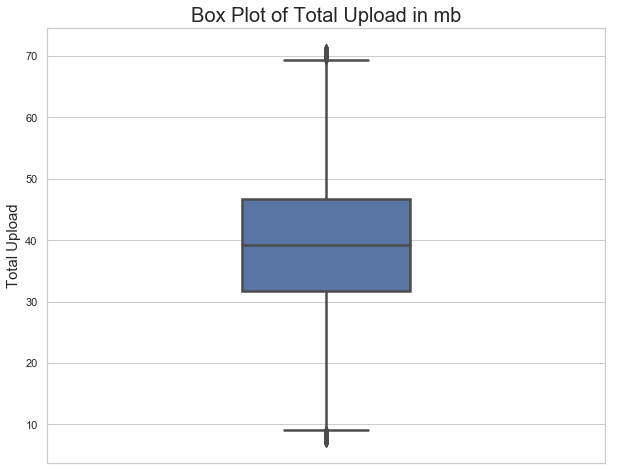

In [60]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Total UL (Bytes)', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Total Upload in mb', fontsize = 20)
ax.set_ylabel('Total Upload',fontsize = 15)
plt.savefig('fig/total_upload.png')

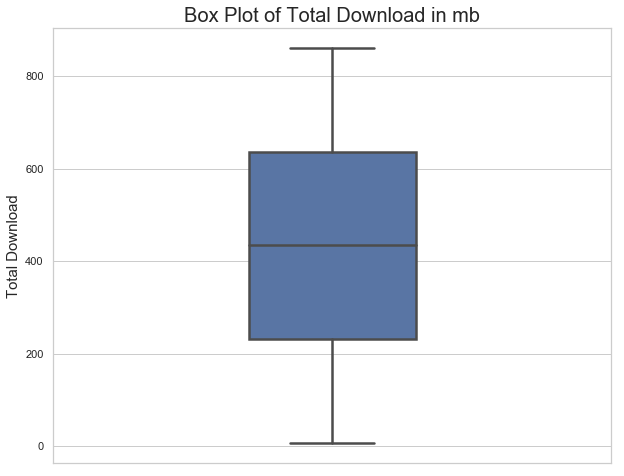

In [61]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Total DL (Bytes)', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Total Download in mb', fontsize = 20)
ax.set_ylabel('Total Download',fontsize = 15)
plt.savefig('fig/total_download.png')

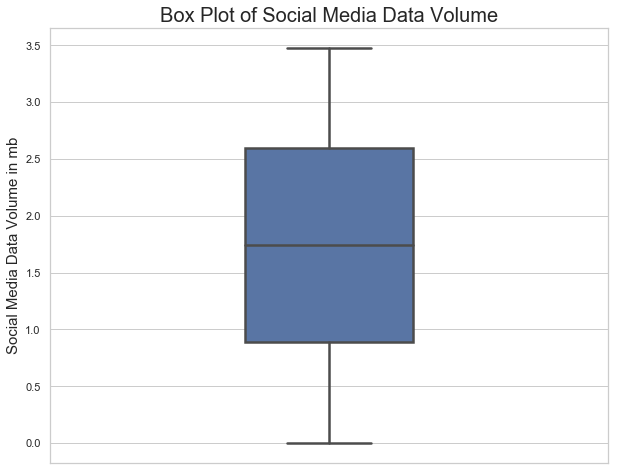

In [62]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Social_media Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Social Media Data Volume', fontsize = 20)
ax.set_ylabel('Social Media Data Volume in mb',fontsize = 15)
plt.savefig('fig/social_media.png')

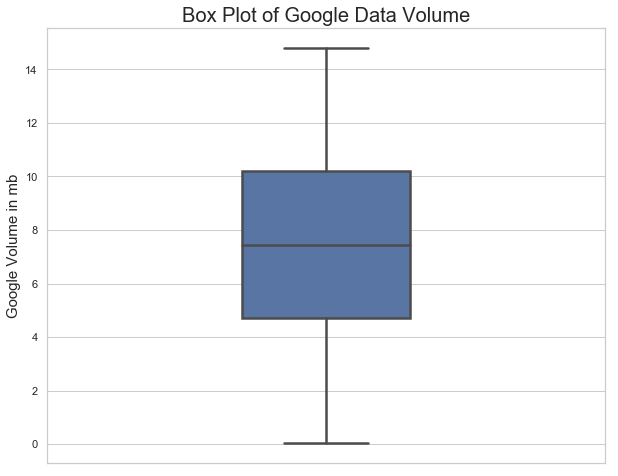

In [63]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Google Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Google Data Volume', fontsize = 20)
ax.set_ylabel('Google Volume in mb',fontsize = 15)
plt.savefig('fig/Google.png')

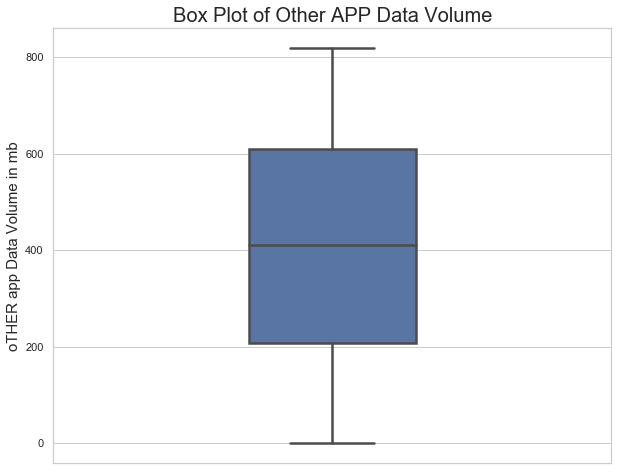

In [64]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Other Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Other APP Data Volume', fontsize = 20)
ax.set_ylabel('oTHER app Data Volume in mb',fontsize = 15)
plt.savefig('fig/other_app.png')

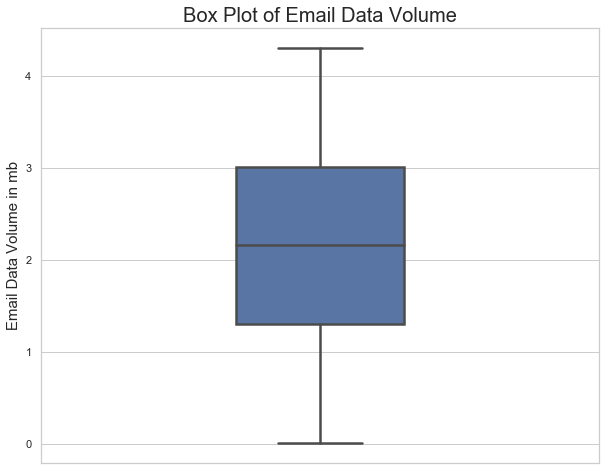

In [65]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Email Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Email Data Volume', fontsize = 20)
ax.set_ylabel('Email Data Volume in mb',fontsize = 15)
plt.savefig('fig/Email.png')

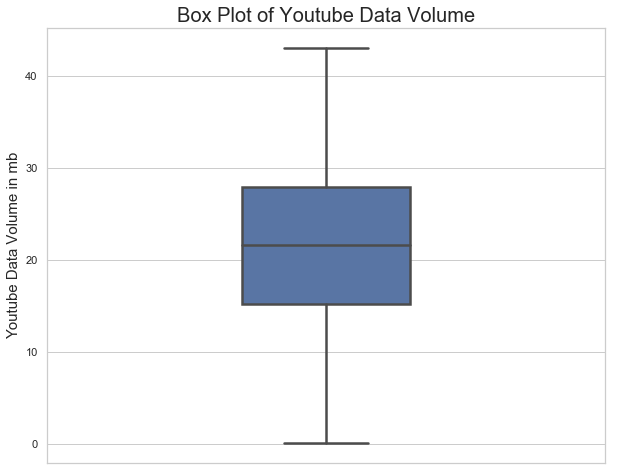

In [66]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Youtube Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Youtube Data Volume', fontsize = 20)
ax.set_ylabel('Youtube Data Volume in mb',fontsize = 15)
plt.savefig('fig/youtube.png')

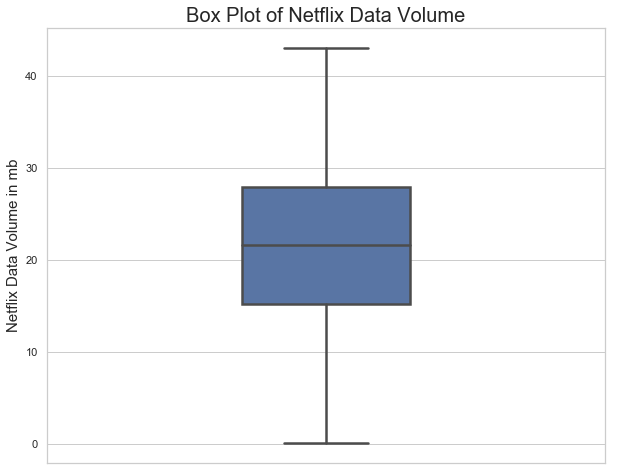

In [67]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Netflix Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Netflix Data Volume', fontsize = 20)
ax.set_ylabel('Netflix Data Volume in mb',fontsize = 15)
plt.savefig('fig/Netflix.png')

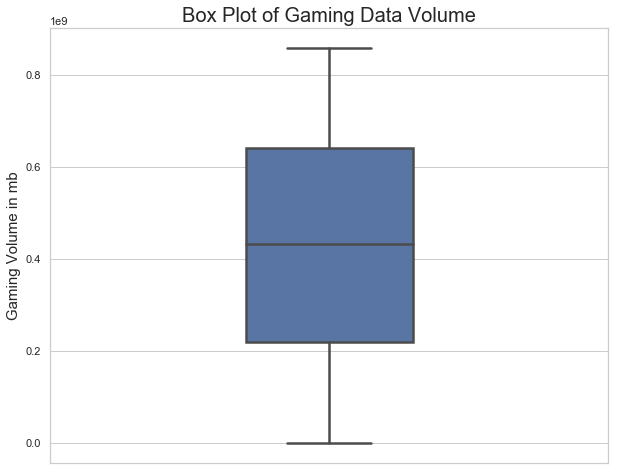

In [68]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Gaming Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Gaming Data Volume', fontsize = 20)
ax.set_ylabel('Gaming Volume in mb',fontsize = 15)
plt.savefig('fig/Gaming.png')

####  Bivariate Analysis on All applicatiions and Total Data using scatter Plot 

In [69]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Social_media Data Volume', linewidth = 2.5, width = 0.3)

SyntaxError: invalid character in identifier (<ipython-input-69-72225418e32e>, line 1)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Google Data Volume', linewidth = 2.5, width = 0.3)

In [70]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Gaming Data Volume', linewidth = 2.5, width = 0.3)

SyntaxError: invalid character in identifier (<ipython-input-70-a71c4ae8374f>, line 1)

In [71]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Netflix Data Volume', linewidth = 2.5, width = 0.3)

SyntaxError: invalid character in identifier (<ipython-input-71-d75e9e7dd508>, line 1)

In [72]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Youtube Data Volume', linewidth = 2.5, width = 0.3)

SyntaxError: invalid character in identifier (<ipython-input-72-1cc9abbb1f2f>, line 1)

In [77]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(data = data_mb ,x = 'Email Data Volume',y='Total Data Volume', marker='D')

SyntaxError: invalid character in identifier (<ipython-input-77-332b625a9b5b>, line 1)

#### convert milliseconds to seconds from Total Duration of xDr

#### Correlation Matrix

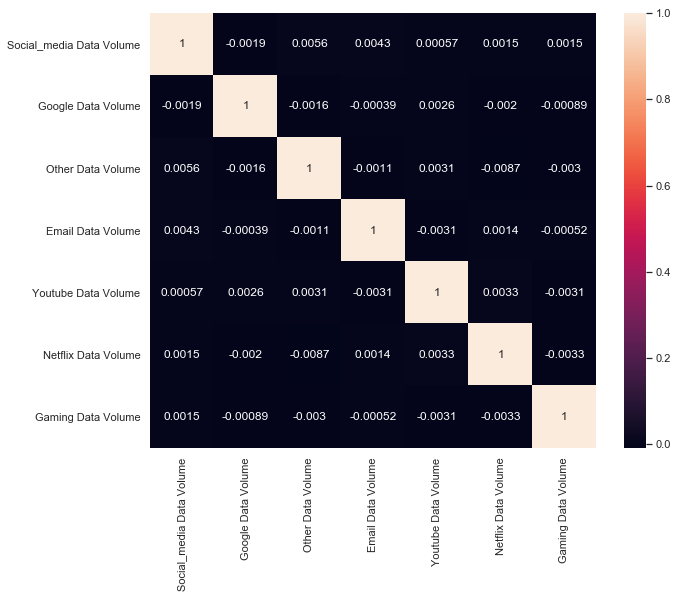

In [150]:
# plot a correlation matrix using the heatmap to show relationship among variables 
# of application

df = data_mb[['Social_media Data Volume','Google Data Volume',\
        'Other Data Volume', 'Email Data Volume','Youtube Data Volume', 'Netflix Data Volume', \
         'Gaming Data Volume']]

fig, ax = plt.subplots(figsize = (10,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True)
plt.savefig('fig/correlation.png')
plt.show()

#### Use dataframe of columns with bytes data 

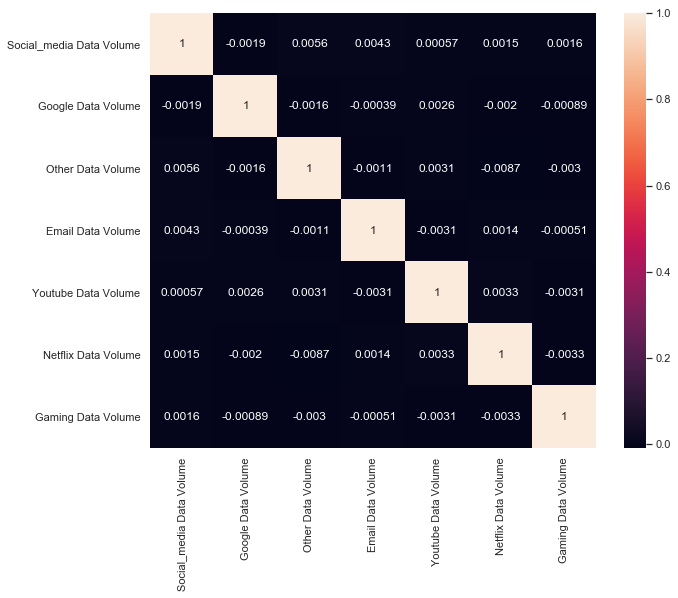

In [89]:
df_2 = data[['Social_media Data Volume','Google Data Volume',\
        'Other Data Volume', 'Email Data Volume','Youtube Data Volume', 'Netflix Data Volume', \
         'Gaming Data Volume']]

fig, ax = plt.subplots(figsize = (10,8))
corrMatrix_2 = df_2.corr()
sns.heatmap(corrMatrix_2, annot = True)
plt.show()

## Dimensionality Reduction

In [139]:
x = data2.loc[:, dr.columns].values
x = StandardScaler().fit_transform(x)

app_r = PCA(n_components=5)
app_R = app_r.fit_transform(x)

In [140]:
#dr_df = pd.DataFrame(app_R, columns = ['PR_1', 'PR_2', 'PR_3'])

In [141]:
app_r.explained_variance_ratio_

array([0.14425697, 0.14384105, 0.14367796, 0.1428649 , 0.14267377])